<a href="https://colab.research.google.com/github/Mads8760/Ciencia-de-dados/blob/main/Ciencia_de_dados_Analise_Exploratoria_pythn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Agora que você aprendeu como usar dados do mercado imobiliário para prever o preço das casas na Califórnia, vamos colocar esse conhecimento em prática com uma oficina.

O objetivo desta oficina é consolidar os conceitos que você aprendeu na aula prática, permitindo que explore o conjunto de dados do mercado imobiliário por conta própria e realize algumas análises adicionais. Você terá a oportunidade de trabalhar com diferentes técnicas de ciência de dados e fazer suas próprias previsões.

Nesta oficina, você vai trabalhar em um conjunto de dados semelhante ao que usamos na aula. A tarefa é aprofundar a análise e a modelagem dos dados de imóveis para responder a algumas questões e realizar previsões.

_______________________________________________________________________________

Questão 1: Análise exploratória de dados (EDA)

Tarefa: crie um gráfico de dispersão (scatter plot) para explorar a relação entre median_income (renda mediana) e median_house_value (valor mediano da casa).



In [ ]:
#Carregamento dos dados e das biblioteca
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns


california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
#Carregamento dos dados frame
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Exibir informações gerais do dataset
california_housing.frame.info()

#  Exibir estatísticas descritivas
california_housing.frame.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

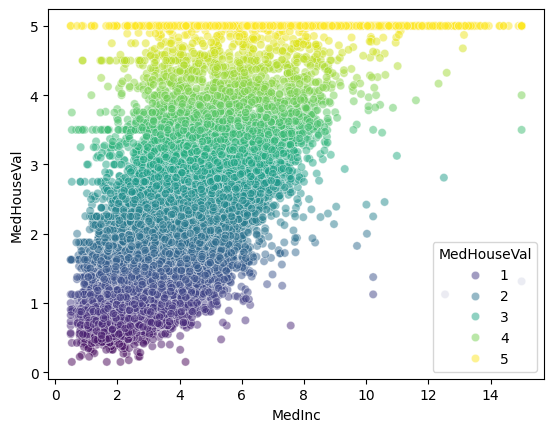

In [ ]:
# Visualizaçao dos dados atraves do grafico de dispersão
sns.scatterplot(
    data= california_housing.frame,
    x="MedInc",
    y="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)



Reflita: o que você observa sobre a relação entre a renda mediana e o valor das casas? Existe uma correlação clara entre essas duas variáveis?  
  

Pode se observar que a medida que o valor da casa aumenta, a renda media para compra vai ficando mais especifica.
_ ___________________________________________________________________________

Questão 2: Divisão dos dados

Tarefa: divida o conjunto de dados em dois subconjuntos: um para treinamento e outro para teste (70% para treinamento e 30% para teste).



In [ ]:
# Importação de bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split, cross_val_score  # Dividir o dataset e realizar validação cruzada
from sklearn.linear_model import LinearRegression, Lasso  # Modelos de regressão linear e Lasso
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para avaliação do modelo


In [ ]:
# Dividir os dados em treino e teste (70% treino, 30% teste)
# Define X and y
X = california_housing.frame[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]  # Features
y = california_housing.frame['MedHouseVal']  # Coluna Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionário para armazenar os resultados
resultados_lr = {}

# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

resultados_lr = (rmse_lr, r2_lr)
print(resultados_lr)

(0.7284008391515456, 0.595770232606166)


Reflita: por que é importante dividir os dados em conjuntos de treinamento e teste antes de treinar um modelo? O que você espera ao testar o modelo no conjunto de teste fazendo essa modificação no código?

Porque precismos separar o material de
uma adequada para que o modelo aprenda sobre os dados em questão. Espero que modelo atraves dos dados preveja os valores das casas.
___________________________________________________________________

Questão 3: Análise de outliers

Tarefa: utilize gráficos, como boxplots, para identificar possíveis outliers nas variáveis median_income e median_house_value.



In [ ]:
# Definir o limite de outliers com base no IQR (Intervalo Interquartil)
df = california_housing.frame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar quantos valores estão fora desses limites
outliers = ((df < limite_inferior) | (df > limite_superior)).sum()
outliers


,0
MedInc,681
HouseAge,0
AveRooms,511
AveBedrms,1424
Population,1196
AveOccup,711
Latitude,0
Longitude,0
MedHouseVal,1071


Reflita: existem valores atípicos (outliers) nessas variáveis? O que você poderia fazer para lidar com esses outliers? É necessário removê-los ou transformá-los para melhorar a precisão do modelo?

Existe sim. Podemos fazer transformação matematica para reduzir o impacto deles nos modelos. Somehnte é necessario remover se forem valores discrepantes. Se forem valores importantes como preço de casa podemos manter.
________________________________________________________________________________

Questão 4: Seleção de variáveis (feature Selection)

Tarefa: treine o modelo de regressão linear utilizando apenas as seguintes variáveis: median_income, housing_median_age, e rooms_per_household. Compare o desempenho do modelo treinado com essas variáveis com o modelo anterior que usava todas as variáveis disponíveis.  



In [ ]:

# Define X and y
X = california_housing.frame[['MedInc', 'HouseAge', 'AveRooms']]  # Features
y = california_housing.frame['MedHouseVal']  # Coluna Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionário para armazenar os resultados
resultados_lr = {}

# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

resultados_lr = (rmse_lr, r2_lr)
print(resultados_lr)


(0.7997901089999427, 0.5126516784926669)


Reflita:  o que aconteceu com o desempenho do modelo ao usar apenas uma seleção de variáveis? Foi melhor ou pior do que o modelo que usava todas as variáveis?

O modelo apresentou um pouco de diferença em relaçao ao anterior, mas a precisão esta dentro do esperado.
_______________________________________________________________________

Questão 5: Implementação de uma árvore de decisão para regressão

Tarefa: implemente uma Árvore de Decisão para prever o valor mediano das casas (median_house_value). Compare o desempenho da Árvore de Decisão com o desempenho do modelo de Regressão Linear usando a métrica Erro Médio Absoluto (MAE).



In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Define X and y
X = california_housing.frame[['MedInc', 'HouseAge', 'AveRooms']]  # Features
y = california_housing.frame['MedHouseVal']  # Coluna Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionário para armazenar os resultados
resultados_dt = {}

#  Árvore de Decisão - Dados SEM Normalização
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

resultados_dt = (rmse_dt, r2_dt)
print(resultados_lr)

(0.7284008391515456, 0.595770232606166)


Reflita:  qual dos modelos teve um desempenho melhor em termos de MAE? Por que a Árvore de Decisão pode ter apresentado melhor (ou pior) desempenho em comparação com a Regressão Linear? Considere como as Árvores de Decisão capturam relações não lineares nos dados.

O resutaldo da Árvore de Decisão foi melhor porque ela pode capturar relações não lineares e se os dados tiverem relações complexas, a Árvore de Decisão pode modelar essas complexidades com mais eficaz.